<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/WPI_pycaret_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret[full]

     |████████████████████████████████| 266kB 5.3MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 276kB 10.6MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 1.7MB 11.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 32.4MB/s 
     |████████████████████████████████| 14.2MB 272kB/s 
     |████████████████████████████████| 174kB 35.7MB/s 
     |████████████████████████████████| 112kB 38.9MB/s 
     |████████████████████████████████| 256kB 35.9MB/s 
     |████████████████████████████████| 1.4MB 30.3MB/s 
     |████████████████████████████████| 6.8MB 26.3MB/s 
     |████████████████████████████████| 358kB 32.6MB/s 
     |████████████████████████████████| 166.7MB 35kB/s 
     |████████████████████████████████| 49.4MB 73kB/

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df

Unnamed: 0    pH   DO    TDS  ...    Sulphate  Phosphate       WPI        WQC
0             0  8.14  8.7   84.0  ...    6.534660    0.06211  0.249528  Excellent
1             1  7.70  8.8  110.0  ...    8.138620    0.00960  0.216400  Excellent
2             2  7.60  7.5   75.0  ...    3.855625    0.01280  0.183814  Excellent
3             3  8.20  9.1   76.0  ...    2.238750    0.01536  0.219282  Excellent
4             4  7.31  7.3   84.0  ...    5.600000    0.01000  0.165831  Excellent
..          ...   ...  ...    ...  ...         ...        ...       ...        ...
482         482  7.60  5.6  224.0  ...  104.480000    0.01500  0.419630  Excellent
483         483  7.30  5.6  266.0  ...   61.068000    0.03300  0.432996  Excellent
484         484  5.10  5.8  290.0  ...   89.910000    0.16300  0.326811  Excellent
485         485  7.40  6.4  230.0  ...   48.500000    0.21900  0.509970       Good
486         486  7.60  6.9  243.0  ...   59.940000    0.07000  0.422551  Excellent

[487 rows x 17 columns]

In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

pH   DO    TDS  Alkalinity  ...   Nitrate    Sulphate  Phosphate       WPI
0    8.14  8.7   84.0        52.0  ...  0.758000    6.534660    0.06211  0.249528
1    7.70  8.8  110.0        76.0  ...  0.196062    8.138620    0.00960  0.216400
2    7.60  7.5   75.0        44.0  ...  0.298875    3.855625    0.01280  0.183814
3    8.20  9.1   76.0        56.0  ...  0.299590    2.238750    0.01536  0.219282
4    7.31  7.3   84.0        52.0  ...  0.106000    5.600000    0.01000  0.165831
..    ...  ...    ...         ...  ...       ...         ...        ...       ...
482  7.60  5.6  224.0         8.0  ...  1.352000  104.480000    0.01500  0.419630
483  7.30  5.6  266.0        96.0  ...  7.074000   61.068000    0.03300  0.432996
484  5.10  5.8  290.0        12.0  ...  9.256000   89.910000    0.16300  0.326811
485  7.40  6.4  230.0        72.0  ...  7.110435   48.500000    0.21900  0.509970
486  7.60  6.9  243.0        68.0  ...  6.385000   59.940000    0.07000  0.422551

[487 rows x 15 columns]

In [8]:
df.shape

(487, 15)

In [9]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (438, 15)
Unseen Data For Predictions: (49, 15)


In [10]:
from pycaret.regression import *
wpi_reg = setup(data = data, target = 'WPI', session_id=999)

Description             Value
0                               session_id               999
1                                   Target               WPI
2                            Original Data         (438, 15)
3                           Missing Values              True
4                         Numeric Features                14
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (306, 14)
10                    Transformed Test Set         (132, 14)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              1096
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50                Feature Selection Method           classic
51            Features Selection Threshold              None
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

In [11]:
best = compare_models(exclude = ['ransac'])

Model     MAE     MSE    RMSE      R2  \
lr                      Linear Regression  0.0007  0.0000  0.0018  0.9981   
br                         Bayesian Ridge  0.0007  0.0000  0.0018  0.9981   
ridge                    Ridge Regression  0.0081  0.0003  0.0151  0.9873   
gbr           Gradient Boosting Regressor  0.0152  0.0020  0.0309  0.9449   
lar                Least Angle Regression  0.0171  0.0044  0.0226  0.9371   
catboost               CatBoost Regressor  0.0141  0.0036  0.0357  0.9295   
et                  Extra Trees Regressor  0.0169  0.0020  0.0330  0.9274   
rf                Random Forest Regressor  0.0214  0.0026  0.0396  0.9044   
xgboost         Extreme Gradient Boosting  0.0178  0.0020  0.0356  0.8996   
ada                    AdaBoost Regressor  0.0320  0.0031  0.0493  0.8432   
dt                Decision Tree Regressor  0.0343  0.0070  0.0643  0.7325   
lightgbm  Light Gradient Boosting Machine  0.0315  0.0068  0.0671  0.7193   
omp           Orthogonal Matching Pursuit  0.0478  0.0045  0.0655  0.6166   
huber                     Huber Regressor  0.0517  0.0156  0.1061  0.4173   
lasso                    Lasso Regression  0.0645  0.0166  0.1124  0.3224   
en                            Elastic Net  0.0645  0.0165  0.1123  0.3204   
llar         Lasso Least Angle Regression  0.0886  0.0219  0.1349 -0.0530   
par          Passive Aggressive Regressor  0.0830  0.0198  0.1301 -0.0855   
knn                 K Neighbors Regressor  0.0721  0.0192  0.1268 -0.0859   

           RMSLE    MAPE  TT (Sec)  
lr        0.0015  0.0032     0.327  
br        0.0015  0.0032     0.015  
ridge     0.0091  0.0231     0.016  
gbr       0.0182  0.0406     0.107  
lar       0.0141  0.0552     0.019  
catboost  0.0204  0.0326     3.011  
et        0.0206  0.0500     0.442  
rf        0.0244  0.0613     0.524  
xgboost   0.0220  0.0510     1.889  
ada       0.0330  0.1096     0.122  
dt        0.0382  0.0985     0.021  
lightgbm  0.0406  0.0787     0.092  
omp       0.0492  0.1642     0.015  
huber     0.0691  0.1301     0.050  
lasso     0.0746  0.1942     0.017  
en        0.0744  0.1917     0.017  
llar      0.0920  0.2837     0.016  
par       0.0877  0.2413     0.018  
knn       0.0844  0.2195     0.065

In [12]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
xgboost           Extreme Gradient Boosting  ...   True
lightgbm    Light Gradient Boosting Machine  ...   True
catboost                 CatBoost Regressor  ...   True

[25 rows x 3 columns]

In [13]:
ada = create_model('ada')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0291  0.0020  0.0449  0.8647  0.0323  0.0971
1     0.0357  0.0026  0.0511  0.9256  0.0340  0.1268
2     0.0281  0.0015  0.0383  0.8105  0.0290  0.1073
3     0.0369  0.0023  0.0476  0.9287  0.0355  0.1500
4     0.0309  0.0021  0.0456  0.9010  0.0327  0.0927
5     0.0286  0.0013  0.0359  0.7588  0.0283  0.1147
6     0.0279  0.0015  0.0390  0.8806  0.0290  0.1030
7     0.0281  0.0012  0.0340  0.7530  0.0265  0.1088
8     0.0464  0.0153  0.1236  0.7866  0.0571  0.0876
9     0.0288  0.0011  0.0332  0.8229  0.0256  0.1078
Mean  0.0320  0.0031  0.0493  0.8432  0.0330  0.1096
SD    0.0057  0.0041  0.0254  0.0626  0.0086  0.0171

In [14]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=999)


In [15]:
lightgbm = create_model('lightgbm')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0330  0.0031  0.0558  0.7912  0.0376  0.0934
1     0.0395  0.0073  0.0857  0.7906  0.0510  0.0886
2     0.0247  0.0030  0.0547  0.6146  0.0357  0.0789
3     0.0359  0.0059  0.0766  0.8156  0.0456  0.0931
4     0.0318  0.0027  0.0524  0.8693  0.0348  0.0800
5     0.0192  0.0008  0.0277  0.8565  0.0207  0.0680
6     0.0139  0.0004  0.0190  0.9715  0.0138  0.0427
7     0.0273  0.0029  0.0540  0.3781  0.0355  0.0805
8     0.0691  0.0395  0.1987  0.4482  0.1015  0.1032
9     0.0206  0.0021  0.0461  0.6572  0.0300  0.0591
Mean  0.0315  0.0068  0.0671  0.7193  0.0406  0.0787
SD    0.0146  0.0111  0.0477  0.1815  0.0227  0.0171

In [16]:
dt = create_model('dt')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0313  0.0026  0.0512  0.8244  0.0370  0.1011
1     0.0751  0.0425  0.2063 -0.2122  0.0970  0.1505
2     0.0315  0.0018  0.0418  0.7743  0.0319  0.1169
3     0.0296  0.0016  0.0401  0.9495  0.0302  0.1084
4     0.0249  0.0016  0.0399  0.9241  0.0255  0.0695
5     0.0233  0.0009  0.0301  0.8309  0.0233  0.0890
6     0.0307  0.0031  0.0560  0.7537  0.0348  0.0838
7     0.0198  0.0009  0.0299  0.8094  0.0227  0.0710
8     0.0552  0.0143  0.1196  0.8001  0.0589  0.1187
9     0.0214  0.0008  0.0283  0.8710  0.0213  0.0757
Mean  0.0343  0.0070  0.0643  0.7325  0.0382  0.0985
SD    0.0166  0.0124  0.0537  0.3203  0.0222  0.0244

In [17]:
tuned_ada = tune_model(ada)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0249  0.0013  0.0355  0.9156  0.0262  0.0895
1     0.0360  0.0027  0.0524  0.9217  0.0348  0.1282
2     0.0299  0.0016  0.0396  0.7979  0.0303  0.1172
3     0.0354  0.0022  0.0467  0.9315  0.0336  0.1388
4     0.0275  0.0014  0.0380  0.9311  0.0272  0.0821
5     0.0279  0.0013  0.0360  0.7586  0.0283  0.1130
6     0.0278  0.0018  0.0427  0.8565  0.0305  0.1014
7     0.0272  0.0012  0.0344  0.7476  0.0266  0.1059
8     0.0490  0.0173  0.1317  0.7577  0.0617  0.0916
9     0.0271  0.0010  0.0314  0.8417  0.0241  0.1007
Mean  0.0313  0.0032  0.0488  0.8460  0.0323  0.1068
SD    0.0068  0.0047  0.0282  0.0726  0.0103  0.0169

In [18]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.2, loss='square',
                  n_estimators=180, random_state=999)


In [19]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [20]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0319  0.0035  0.0593  0.7644  0.0400  0.0905
1     0.0394  0.0077  0.0878  0.7806  0.0526  0.0890
2     0.0266  0.0038  0.0620  0.5047  0.0394  0.0830
3     0.0330  0.0032  0.0568  0.8986  0.0354  0.0962
4     0.0267  0.0020  0.0443  0.9063  0.0296  0.0704
5     0.0190  0.0007  0.0265  0.8693  0.0196  0.0647
6     0.0150  0.0004  0.0210  0.9654  0.0153  0.0464
7     0.0286  0.0038  0.0617  0.1896  0.0394  0.0813
8     0.0695  0.0366  0.1913  0.4886  0.0970  0.1120
9     0.0217  0.0019  0.0441  0.6873  0.0293  0.0645
Mean  0.0311  0.0064  0.0655  0.7055  0.0398  0.0798
SD    0.0144  0.0103  0.0457  0.2313  0.0216  0.0178

In [21]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=80,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=70, objective=None,
              random_state=999, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [22]:
tuned_dt = tune_model(dt)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0373  0.0032  0.0570  0.7825  0.0417  0.1229
1     0.0502  0.0041  0.0644  0.8818  0.0454  0.1740
2     0.0403  0.0033  0.0579  0.5683  0.0429  0.1390
3     0.0430  0.0036  0.0603  0.8858  0.0440  0.1643
4     0.0409  0.0033  0.0570  0.8450  0.0416  0.1198
5     0.0410  0.0028  0.0530  0.4752  0.0409  0.1575
6     0.0544  0.0045  0.0673  0.6436  0.0501  0.1868
7     0.0473  0.0037  0.0605  0.2209  0.0461  0.1739
8     0.0595  0.0232  0.1522  0.6761  0.0741  0.1209
9     0.0393  0.0020  0.0442  0.6856  0.0342  0.1418
Mean  0.0453  0.0054  0.0674  0.6665  0.0461  0.1501
SD    0.0069  0.0060  0.0289  0.1963  0.0101  0.0233

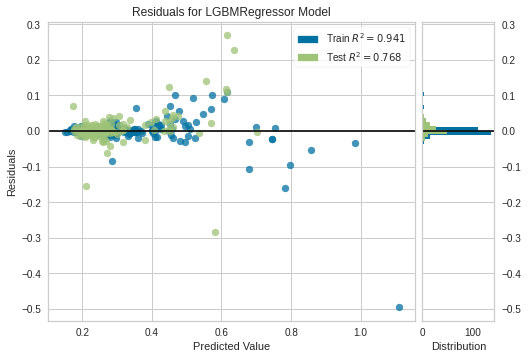

In [23]:
plot_model(tuned_lightgbm)

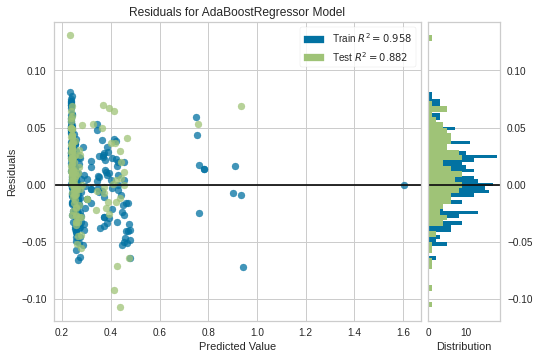

In [24]:
plot_model(tuned_ada)

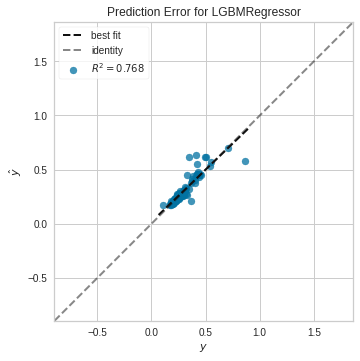

In [25]:
plot_model(tuned_lightgbm, plot = 'error')

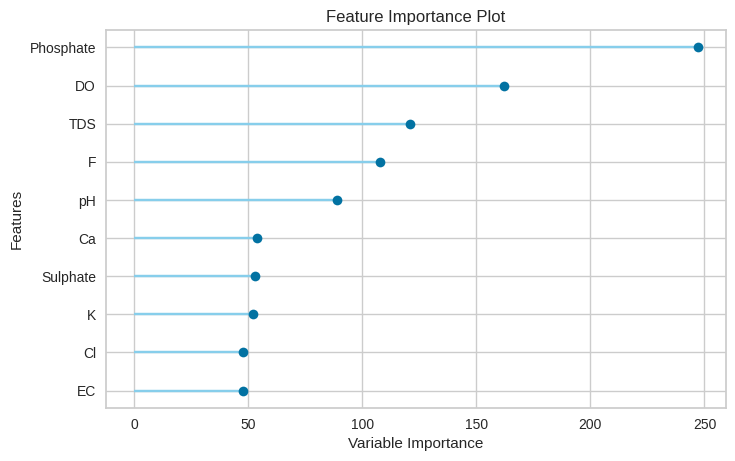

In [26]:
plot_model(tuned_lightgbm, plot='feature')

In [27]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(tuned_lightgbm);

Model     MAE     MSE  ...      R2   RMSLE    MAPE
0  Light Gradient Boosting Machine  0.0229  0.0025  ...  0.7682  0.0338  0.0719

[1 rows x 7 columns]

In [29]:
gbr = create_model('gbr')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0153  0.0007  0.0260  0.9546  0.0178  0.0454
1     0.0168  0.0013  0.0367  0.9617  0.0209  0.0385
2     0.0116  0.0004  0.0189  0.9540  0.0141  0.0445
3     0.0120  0.0003  0.0168  0.9911  0.0115  0.0416
4     0.0116  0.0003  0.0183  0.9840  0.0125  0.0315
5     0.0107  0.0002  0.0154  0.9559  0.0117  0.0384
6     0.0129  0.0004  0.0204  0.9674  0.0138  0.0367
7     0.0123  0.0004  0.0190  0.9229  0.0140  0.0421
8     0.0410  0.0163  0.1278  0.7717  0.0587  0.0597
9     0.0074  0.0001  0.0096  0.9852  0.0074  0.0277
Mean  0.0152  0.0020  0.0309  0.9449  0.0182  0.0406
SD    0.0089  0.0048  0.0330  0.0607  0.0139  0.0082

In [30]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=999, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [31]:
tuned_gbr = tune_model(gbr)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0234  0.0014  0.0381  0.9030  0.0278  0.0814
1     0.0248  0.0016  0.0397  0.9551  0.0253  0.0771
2     0.0159  0.0005  0.0224  0.9352  0.0171  0.0585
3     0.0183  0.0008  0.0275  0.9762  0.0205  0.0645
4     0.0139  0.0004  0.0201  0.9808  0.0145  0.0452
5     0.0158  0.0007  0.0255  0.8785  0.0194  0.0555
6     0.0218  0.0011  0.0335  0.9116  0.0237  0.0683
7     0.0246  0.0015  0.0391  0.6737  0.0289  0.0828
8     0.0346  0.0126  0.1123  0.8237  0.0501  0.0565
9     0.0150  0.0004  0.0191  0.9410  0.0143  0.0512
Mean  0.0208  0.0021  0.0377  0.8979  0.0242  0.0641
SD    0.0061  0.0035  0.0259  0.0871  0.0100  0.0123

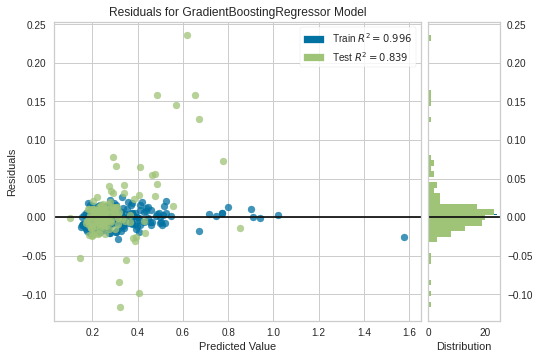

In [32]:
plot_model(tuned_gbr)

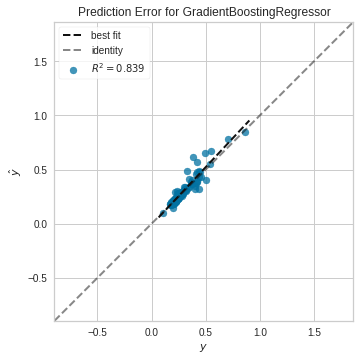

In [33]:
plot_model(tuned_gbr, plot = 'error')

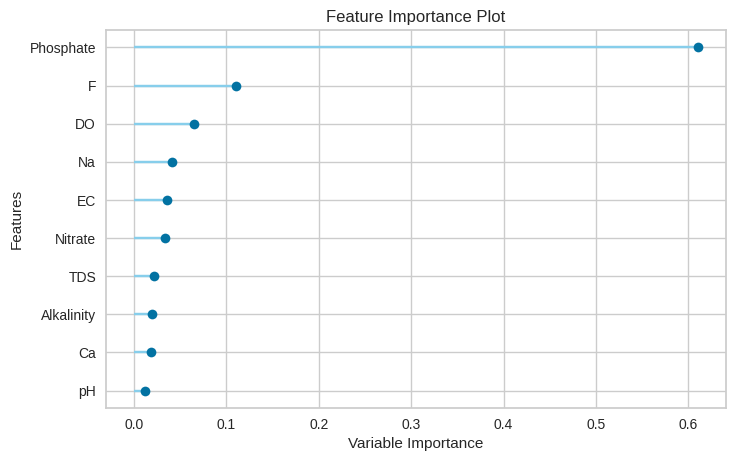

In [34]:
plot_model(tuned_gbr, plot='feature')

In [35]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
predict_model(tuned_gbr);

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  0.0224  0.0018  0.0418  0.8386  0.0291  0.0714

In [38]:
final_gbr = finalize_model(tuned_gbr)

In [39]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=3,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=290,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=999, subsample=0.3, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [40]:
predict_model(final_gbr);

Model     MAE     MSE    RMSE     R2   RMSLE   MAPE
0  Gradient Boosting Regressor  0.0063  0.0001  0.0081  0.994  0.0063  0.024

In [41]:
unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

pH    DO    TDS  Alkalinity  ...  Sulphate  Phosphate       WPI     Label
0  8.40  7.40  103.0        52.0  ...    12.810      0.106  0.308627  0.307059
1  8.10  8.70  102.0        56.0  ...    10.440      0.234  0.380511  0.378211
2  7.30  8.19   98.0        44.0  ...    16.790      0.038  0.197155  0.199861
3  7.90  7.20   80.0        56.0  ...     4.100      0.065  0.253932  0.244717
4  7.31  7.80  132.0        44.0  ...    14.193      0.089  0.274732  0.244296

[5 rows x 16 columns]

In [42]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.WPI, unseen_predictions.Label, 'R2')

0.9485

In [43]:
save_model(final_gbr,'Final GBR')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='WPI',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                            learning_rate=0.3, loss='ls',
                                            max_depth=3, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.001,
                          

In [44]:
saved_final_gbr = load_model('Final GBR')

Transformation Pipeline and Model Successfully Loaded


In [45]:
new_prediction = predict_model(saved_final_gbr, data=data_unseen)

In [46]:
new_prediction.head()

pH    DO    TDS  Alkalinity  ...  Sulphate  Phosphate       WPI     Label
0  8.40  7.40  103.0        52.0  ...    12.810      0.106  0.308627  0.307059
1  8.10  8.70  102.0        56.0  ...    10.440      0.234  0.380511  0.378211
2  7.30  8.19   98.0        44.0  ...    16.790      0.038  0.197155  0.199861
3  7.90  7.20   80.0        56.0  ...     4.100      0.065  0.253932  0.244717
4  7.31  7.80  132.0        44.0  ...    14.193      0.089  0.274732  0.244296

[5 rows x 16 columns]

In [48]:
from pycaret.utils import check_metric
check_metric(new_prediction.WPI, new_prediction.Label, 'R2')

0.9485

**Ensembling, Bagging, Boosting, Blending..**

In [49]:
df.shape

(487, 15)

In [50]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (438, 15)
Unseen Data For Predictions (49, 15)


In [51]:
from pycaret.regression import *

In [59]:
wpi_reg2 = setup(data = data, target = 'WPI', session_id=369,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  bin_numeric_features = ['DO'],
                  log_experiment = True, experiment_name = 'wpi1')

Description           Value
0                               session_id             369
1                                   Target             WPI
2                            Original Data       (438, 15)
3                           Missing Values            True
4                         Numeric Features              14
5                     Categorical Features               0
6                         Ordinal Features           False
7                High Cardinality Features           False
8                  High Cardinality Method            None
9                    Transformed Train Set       (306, 21)
10                    Transformed Test Set       (132, 21)
11                      Shuffle Train-Test            True
12                     Stratify Train-Test           False
13                          Fold Generator           KFold
14                             Fold Number              10
15                                CPU Jobs              -1
16                                 Use GPU           False
17                          Log Experiment            True
18                         Experiment Name            wpi1
19                                     USI            32a3
20                         Imputation Type          simple
21          Iterative Imputation Iteration            None
22                         Numeric Imputer            mean
23      Iterative Imputation Numeric Model            None
24                     Categorical Imputer        constant
25  Iterative Imputation Categorical Model            None
26           Unknown Categoricals Handling  least_frequent
27                               Normalize            True
28                        Normalize Method          zscore
29                          Transformation            True
30                   Transformation Method     yeo-johnson
31                                     PCA           False
32                              PCA Method            None
33                          PCA Components            None
34                     Ignore Low Variance           False
35                     Combine Rare Levels            True
36                    Rare Level Threshold            0.05
37                         Numeric Binning            True
38                         Remove Outliers           False
39                      Outliers Threshold            None
40                Remove Multicollinearity            True
41             Multicollinearity Threshold            0.95
42                              Clustering           False
43                    Clustering Iteration            None
44                     Polynomial Features           False
45                       Polynomial Degree            None
46                    Trignometry Features           False
47                    Polynomial Threshold            None
48                          Group Features           False
49                       Feature Selection           False
50                Feature Selection Method         classic
51            Features Selection Threshold            None
52                     Feature Interaction           False
53                           Feature Ratio           False
54                   Interaction Threshold            None
55                        Transform Target            True
56                 Transform Target Method         box-cox

In [60]:
top3 = compare_models(exclude = ['ransac'], n_select = 3)

Model     MAE     MSE    RMSE      R2  \
xgboost         Extreme Gradient Boosting  0.0219  0.0033  0.0439  0.8545   
gbr           Gradient Boosting Regressor  0.0211  0.0045  0.0486  0.8484   
catboost               CatBoost Regressor  0.0181  0.0057  0.0506  0.8431   
et                  Extra Trees Regressor  0.0228  0.0055  0.0550  0.8183   
rf                Random Forest Regressor  0.0257  0.0056  0.0578  0.7897   
ada                    AdaBoost Regressor  0.0303  0.0049  0.0566  0.7775   
lightgbm  Light Gradient Boosting Machine  0.0275  0.0078  0.0712  0.6840   
dt                Decision Tree Regressor  0.0339  0.0047  0.0622  0.6816   
knn                 K Neighbors Regressor  0.0341  0.0101  0.0766  0.6484   
huber                     Huber Regressor  0.0306  0.0096  0.0773  0.6359   
br                         Bayesian Ridge  0.0325  0.0083  0.0763  0.6203   
ridge                    Ridge Regression  0.0330  0.0088  0.0779  0.6065   
lr                      Linear Regression  0.0336  0.0096  0.0803  0.5868   
lar                Least Angle Regression  0.0347  0.0097  0.0810  0.5802   
omp           Orthogonal Matching Pursuit  0.0406  0.0088  0.0782  0.5623   
en                            Elastic Net  0.0647  0.0176  0.1159  0.0889   
lasso                    Lasso Regression  0.0716  0.0192  0.1230 -0.0552   
llar         Lasso Least Angle Regression  0.0716  0.0192  0.1230 -0.0552   
par          Passive Aggressive Regressor  0.0474  0.0157  0.1103 -0.4570   

           RMSLE    MAPE  TT (Sec)  
xgboost   0.0276  0.0618     3.950  
gbr       0.0289  0.0532     0.103  
catboost  0.0296  0.0408     3.047  
et        0.0326  0.0574     0.352  
rf        0.0348  0.0673     0.448  
ada       0.0357  0.0870     0.119  
lightgbm  0.0430  0.0664     0.045  
dt        0.0407  0.1039     0.024  
knn       0.0481  0.0890     0.069  
huber     0.0479  0.0709     0.041  
br        0.0472  0.0789     0.021  
ridge     0.0481  0.0799     0.021  
lr        0.0496  0.0811     0.020  
lar       0.0502  0.0847     0.026  
omp       0.0497  0.1153     0.023  
en        0.0781  0.1855     0.022  
lasso     0.0839  0.2110     0.021  
llar      0.0839  0.2110     0.022  
par       0.0667  0.1175     0.022

In [61]:
type(top3)

list

In [62]:
print(top3)

[PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_estimators=100, n_jobs=-1,
                                nu...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
                                                   

In [63]:
gbr = create_model('gbr', fold = 5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0119  0.0004  0.0189  0.9632  0.0135  0.0391
1     0.0092  0.0002  0.0140  0.9679  0.0106  0.0330
2     0.0423  0.0169  0.1301  0.6477  0.0665  0.0735
3     0.0198  0.0014  0.0376  0.8641  0.0243  0.0619
4     0.0230  0.0038  0.0620  0.7424  0.0380  0.0692
Mean  0.0212  0.0045  0.0525  0.8371  0.0306  0.0553
SD    0.0117  0.0063  0.0423  0.1254  0.0204  0.0163

In [65]:
rf = create_model('rf', round = 2)

MAE   MSE  RMSE    R2  RMSLE  MAPE
0     0.02  0.00  0.02  0.91   0.02  0.06
1     0.02  0.00  0.05  0.85   0.03  0.05
2     0.02  0.00  0.02  0.86   0.02  0.06
3     0.02  0.00  0.02  0.92   0.02  0.06
4     0.06  0.03  0.18  0.54   0.09  0.10
5     0.03  0.00  0.07  0.80   0.04  0.06
6     0.02  0.00  0.06  0.79   0.04  0.06
7     0.02  0.00  0.03  0.74   0.03  0.08
8     0.04  0.01  0.10  0.53   0.06  0.11
9     0.01  0.00  0.02  0.95   0.01  0.05
Mean  0.03  0.01  0.06  0.79   0.03  0.07
SD    0.01  0.01  0.05  0.14   0.02  0.02

In [66]:
knn = create_model('knn')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0202  0.0007  0.0259  0.8645  0.0201  0.0775
1     0.0342  0.0042  0.0652  0.7044  0.0426  0.0870
2     0.0180  0.0005  0.0229  0.8842  0.0180  0.0677
3     0.0225  0.0015  0.0383  0.8059  0.0280  0.0771
4     0.0896  0.0568  0.2383  0.1938  0.1312  0.1355
5     0.0343  0.0100  0.0998  0.5431  0.0587  0.0765
6     0.0381  0.0094  0.0969  0.4375  0.0617  0.0991
7     0.0170  0.0005  0.0215  0.8923  0.0165  0.0623
8     0.0472  0.0167  0.1294  0.2694  0.0835  0.1311
9     0.0204  0.0008  0.0278  0.8886  0.0209  0.0757
Mean  0.0341  0.0101  0.0766  0.6484  0.0481  0.0890
SD    0.0208  0.0164  0.0651  0.2556  0.0351  0.0241

In [67]:
print(knn)

PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=5, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=5,
                                                              p=2,
                                                              weights='uniform'),
                                weights='unifo

In [68]:

tuned_knn = tune_model(knn)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0202  0.0007  0.0259  0.8645  0.0201  0.0775
1     0.0342  0.0042  0.0652  0.7044  0.0426  0.0870
2     0.0180  0.0005  0.0229  0.8842  0.0180  0.0677
3     0.0225  0.0015  0.0383  0.8059  0.0280  0.0771
4     0.0896  0.0568  0.2383  0.1938  0.1312  0.1355
5     0.0343  0.0100  0.0998  0.5431  0.0587  0.0765
6     0.0381  0.0094  0.0969  0.4375  0.0617  0.0991
7     0.0170  0.0005  0.0215  0.8923  0.0165  0.0623
8     0.0472  0.0167  0.1294  0.2694  0.0835  0.1311
9     0.0204  0.0008  0.0278  0.8886  0.0209  0.0757
Mean  0.0341  0.0101  0.0766  0.6484  0.0481  0.0890
SD    0.0208  0.0164  0.0651  0.2556  0.0351  0.0241

In [69]:
tuned_knn2 = tune_model(knn, n_iter = 50)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0228  0.0009  0.0306  0.8116  0.0233  0.0874
1     0.0331  0.0035  0.0588  0.7594  0.0392  0.0873
2     0.0204  0.0007  0.0273  0.8358  0.0207  0.0758
3     0.0233  0.0017  0.0410  0.7770  0.0301  0.0781
4     0.0885  0.0555  0.2355  0.2129  0.1291  0.1346
5     0.0345  0.0106  0.1031  0.5131  0.0610  0.0774
6     0.0395  0.0082  0.0906  0.5087  0.0574  0.1033
7     0.0179  0.0005  0.0234  0.8720  0.0181  0.0633
8     0.0432  0.0158  0.1258  0.3089  0.0806  0.1154
9     0.0190  0.0006  0.0248  0.9113  0.0192  0.0729
Mean  0.0342  0.0098  0.0761  0.6511  0.0479  0.0895
SD    0.0200  0.0160  0.0634  0.2350  0.0337  0.0208

In [70]:
plot_model(tuned_knn, plot = 'parameter')

Parameters
algorithm                                                                   auto
leaf_size                                                                     30
metric                                                                 euclidean
metric_params                                                               None
n_jobs                                                                        -1
n_neighbors                                                                    5
p                                                                              2
weights                                                                  uniform
power_transformer_method                                                 box-cox
power_transformer_standardize                                               True
regressor                      KNeighborsRegressor(algorithm='auto', leaf_siz...

In [71]:
plot_model(tuned_knn2, plot = 'parameter')

Parameters
algorithm                                                                   auto
leaf_size                                                                     30
metric                                                                 euclidean
metric_params                                                               None
n_jobs                                                                        -1
n_neighbors                                                                    3
p                                                                              2
weights                                                                  uniform
power_transformer_method                                                 box-cox
power_transformer_standardize                                               True
regressor                      KNeighborsRegressor(algorithm='auto', leaf_siz...

In [74]:
dt = create_model('dt')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0283  0.0016  0.0395  0.6851  0.0303  0.1011
1     0.0298  0.0036  0.0603  0.7466  0.0387  0.0761
2     0.0252  0.0013  0.0360  0.7143  0.0273  0.0871
3     0.0269  0.0032  0.0569  0.5713  0.0368  0.0899
4     0.0534  0.0141  0.1189  0.7995  0.0585  0.1070
5     0.0356  0.0031  0.0559  0.8567  0.0394  0.1192
6     0.0316  0.0026  0.0511  0.8433  0.0359  0.1021
7     0.0345  0.0027  0.0517  0.3755  0.0389  0.1227
8     0.0489  0.0131  0.1146  0.4263  0.0729  0.1409
9     0.0251  0.0014  0.0375  0.7979  0.0283  0.0926
Mean  0.0339  0.0047  0.0622  0.6816  0.0407  0.1039
SD    0.0093  0.0045  0.0284  0.1614  0.0136  0.0183

In [75]:
bagged_dt = ensemble_model(dt)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0189  0.0007  0.0273  0.8493  0.0204  0.0628
1     0.0269  0.0033  0.0571  0.7732  0.0362  0.0680
2     0.0174  0.0007  0.0271  0.8382  0.0200  0.0590
3     0.0196  0.0009  0.0298  0.8824  0.0216  0.0667
4     0.0531  0.0252  0.1587  0.6423  0.0769  0.0814
5     0.0272  0.0048  0.0691  0.7813  0.0392  0.0649
6     0.0221  0.0022  0.0467  0.8695  0.0284  0.0642
7     0.0249  0.0013  0.0366  0.6872  0.0275  0.0832
8     0.0432  0.0117  0.1080  0.4907  0.0677  0.1215
9     0.0141  0.0003  0.0176  0.9554  0.0137  0.0550
Mean  0.0267  0.0051  0.0578  0.7770  0.0352  0.0727
SD    0.0116  0.0074  0.0421  0.1299  0.0200  0.0183

In [76]:
print(bagged_dt)

PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fraction_leaf=0.0,
                                                                     presort='deprecated',
        

In [77]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0203  0.0008  0.0290  0.8309  0.0216  0.0688
1     0.0221  0.0011  0.0327  0.9255  0.0230  0.0682
2     0.0185  0.0007  0.0267  0.8421  0.0202  0.0653
3     0.0165  0.0009  0.0304  0.8776  0.0220  0.0553
4     0.0429  0.0151  0.1230  0.7851  0.0571  0.0709
5     0.0264  0.0016  0.0395  0.9283  0.0268  0.0781
6     0.0207  0.0010  0.0316  0.9402  0.0222  0.0707
7     0.0228  0.0016  0.0394  0.6368  0.0297  0.0750
8     0.0452  0.0126  0.1121  0.4515  0.0705  0.1191
9     0.0162  0.0005  0.0216  0.9329  0.0161  0.0580
Mean  0.0252  0.0036  0.0486  0.8151  0.0309  0.0729
SD    0.0099  0.0052  0.0349  0.1498  0.0171  0.0168

In [80]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

In [81]:
blender = blend_models(estimator_list = [lightgbm, dt, lr])

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0151  0.0004  0.0190  0.9273  0.0147  0.0541
1     0.0223  0.0032  0.0564  0.7783  0.0355  0.0528
2     0.0099  0.0002  0.0137  0.9588  0.0106  0.0364
3     0.0134  0.0005  0.0219  0.9363  0.0155  0.0451
4     0.0620  0.0358  0.1892  0.4918  0.0964  0.0866
5     0.0268  0.0076  0.0872  0.6510  0.0501  0.0580
6     0.0209  0.0032  0.0567  0.8074  0.0337  0.0531
7     0.0142  0.0004  0.0212  0.8954  0.0162  0.0516
8     0.0360  0.0130  0.1140  0.4333  0.0713  0.0913
9     0.0136  0.0004  0.0211  0.9362  0.0154  0.0492
Mean  0.0234  0.0065  0.0600  0.7816  0.0359  0.0578
SD    0.0148  0.0105  0.0536  0.1834  0.0273  0.0166

In [82]:
blender_top3 = blend_models(top3)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0113  0.0003  0.0167  0.9435  0.0129  0.0412
1     0.0152  0.0011  0.0335  0.9218  0.0209  0.0369
2     0.0093  0.0002  0.0144  0.9542  0.0107  0.0311
3     0.0084  0.0002  0.0137  0.9750  0.0102  0.0306
4     0.0523  0.0271  0.1647  0.6148  0.0815  0.0716
5     0.0187  0.0025  0.0504  0.8834  0.0280  0.0431
6     0.0156  0.0012  0.0341  0.9305  0.0204  0.0457
7     0.0155  0.0005  0.0216  0.8905  0.0164  0.0531
8     0.0352  0.0106  0.1030  0.5370  0.0635  0.0889
9     0.0093  0.0002  0.0137  0.9730  0.0104  0.0336
Mean  0.0191  0.0044  0.0466  0.8624  0.0275  0.0476
SD    0.0133  0.0082  0.0471  0.1471  0.0235  0.0180

In [83]:
print(blender_top3.estimators_)

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=369, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
             

In [84]:
stacker = stack_models(top3)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0138  0.0004  0.0211  0.9103  0.0155  0.0454
1     0.0123  0.0004  0.0203  0.9714  0.0150  0.0385
2     0.0128  0.0003  0.0179  0.9294  0.0130  0.0425
3     0.0113  0.0003  0.0185  0.9545  0.0129  0.0372
4     0.0642  0.0422  0.2054  0.4012  0.1057  0.0820
5     0.0215  0.0043  0.0652  0.8049  0.0364  0.0470
6     0.0123  0.0003  0.0165  0.9836  0.0127  0.0459
7     0.0140  0.0004  0.0204  0.9022  0.0151  0.0468
8     0.0291  0.0088  0.0936  0.6177  0.0565  0.0707
9     0.0136  0.0008  0.0279  0.8884  0.0205  0.0481
Mean  0.0205  0.0058  0.0507  0.8364  0.0303  0.0504
SD    0.0155  0.0124  0.0570  0.1770  0.0285  0.0137

In [85]:
xgboost = create_model('xgboost')
stacker2 = stack_models(top3, meta_model = xgboost)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0139  0.0004  0.0211  0.9106  0.0156  0.0462
1     0.0137  0.0004  0.0200  0.9723  0.0142  0.0439
2     0.0091  0.0001  0.0117  0.9696  0.0088  0.0305
3     0.0094  0.0002  0.0140  0.9739  0.0105  0.0345
4     0.0384  0.0159  0.1261  0.7743  0.0578  0.0500
5     0.0110  0.0003  0.0163  0.9878  0.0117  0.0355
6     0.0141  0.0008  0.0275  0.9548  0.0160  0.0407
7     0.0148  0.0005  0.0214  0.8933  0.0158  0.0508
8     0.0233  0.0024  0.0493  0.8938  0.0297  0.0732
9     0.0099  0.0002  0.0155  0.9654  0.0120  0.0368
Mean  0.0158  0.0021  0.0323  0.9296  0.0192  0.0442
SD    0.0085  0.0046  0.0329  0.0615  0.0140  0.0116